In [67]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [68]:
cd 'drive/MyDrive/TEMC/trabalho'

[Errno 2] No such file or directory: 'drive/MyDrive/TEMC/trabalho'
/content/drive/MyDrive/TEMC/trabalho


In [69]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np




train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Exibir DataFrame

train.head(1000)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [104]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [105]:
titanic_df = pd.concat([train, test])
titanic_df.head(1000)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
104,996,1,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.0,1,1,2625,8.5167,NaN,C
105,997,0,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.525,NaN,S
106,998,0,3,"Buckley, Mr. Daniel",male,21.0,0,0,330920,7.8208,NaN,Q
107,999,0,3,"Ryan, Mr. Edward",male,NaN,0,0,383162,7.75,NaN,Q


In [106]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000


In [107]:
# Contar o número de ocorrências de cada classe na variável-alvo 'Survived'
survived_counts = titanic_df['Survived'].value_counts()

# Exibir a contagem de ocorrências de cada classe
print("Contagem de ocorrências de cada classe na variável-alvo 'Survived':")
print(survived_counts)

Contagem de ocorrências de cada classe na variável-alvo 'Survived':
Survived
0    815
1    494
Name: count, dtype: int64


In [108]:
#Não há valores duplicados
titanic_df[titanic_df.duplicated() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [109]:
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

# Localizar a linha com o maior valor de 'Fare'
max_fare_row = titanic_df.loc[titanic_df['Fare'].idxmax()]

print(max_fare_row)

     PassengerId  Survived  Pclass                                   Name  \
150          151         0       2             Bateman, Rev. Robert James   
150         1042         1       1  Earnshaw, Mrs. Boulton (Olive Potter)   

        Sex   Age  SibSp  Parch       Ticket     Fare Cabin Embarked  
150    male  51.0      0      0  S.O.P. 1166   12.525   NaN        S  
150  female  23.0      0      1        11767  831.583   C54        C  


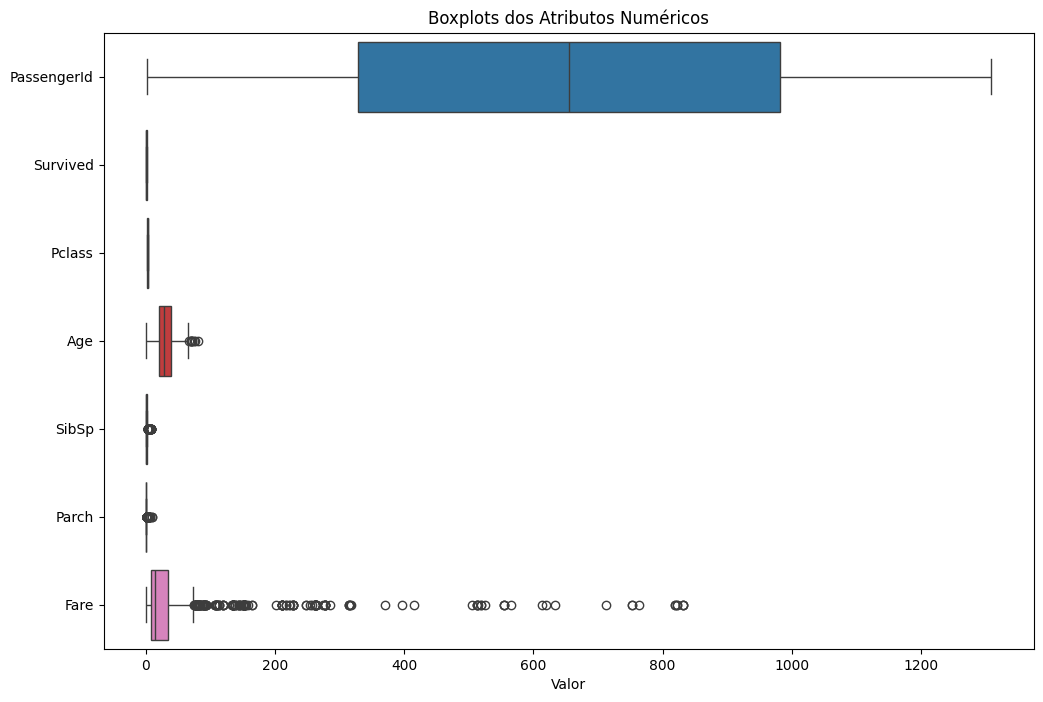

In [110]:
# Selecionar apenas atributos numéricos
atributos_numericos = titanic_df.select_dtypes(include=['float64', 'int64'])

# Plotar boxplots para cada atributo numérico
plt.figure(figsize=(12, 8))
sns.boxplot(data=atributos_numericos, orient="h")
plt.title("Boxplots dos Atributos Numéricos")
plt.xlabel("Valor")
plt.show()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
150,1042,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,831.583,C54,C
179,1071,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,831.583,E45,C
181,1073,0,1,"Compton, Mr. Alexander Taylor Jr",male,37.0,1,1,PC 17756,831.583,E52,C


In [112]:
#Calculando a media para todos os atributos
titanic_df.mean(numeric_only=True)

PassengerId    655.000000
Survived         0.377387
Pclass           2.294882
Age             29.881138
SibSp            0.498854
Parch            0.385027
Fare            48.624269
dtype: float64

In [79]:
#Calculando o desvio-padrão para todos os atributos
titanic_df.std(numeric_only=True)

PassengerId    378.020061
Survived         0.484918
Pclass           0.837836
Age             14.413493
SibSp            1.041658
Parch            0.865560
Fare           104.436107
dtype: float64

In [80]:
#Calculando a variância para todos os atributos
titanic_df.var(numeric_only=True)

PassengerId    142899.166667
Survived            0.235146
Pclass              0.701969
Age               207.748787
SibSp               1.085052
Parch               0.749195
Fare            10906.900384
dtype: float64

In [81]:
#Calculando a matriz de correlação para todos os atributos
titanic_df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.183446
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.144137
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.420944
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.143882
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.101077
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.140362
Fare,0.183446,0.144137,-0.420944,0.143882,0.101077,0.140362,1.000000


In [82]:
#Calculando o valor minimo de cada atributo
titanic_df.min(numeric_only=True)

PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.17
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

In [83]:
#Calculando o valor maximo de cada atributo
titanic_df.max(numeric_only=True)

PassengerId    1309.000
Survived          1.000
Pclass            3.000
Age              80.000
SibSp             8.000
Parch             9.000
Fare            831.583
dtype: float64

In [84]:
#Soma dos valores faltantes de cada atributo
titanic_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare             13
Cabin          1014
Embarked          2
dtype: int64

In [113]:
titanic_df[titanic_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [86]:
#Após verificar manualmente os valores de embarque faltantes, encontrei que os dois passageiros embarcaram em Southampton, e os valores faltantes recebem 'S'
titanic_df.loc[titanic_df.Embarked.isnull(), 'Embarked'] = 'S'


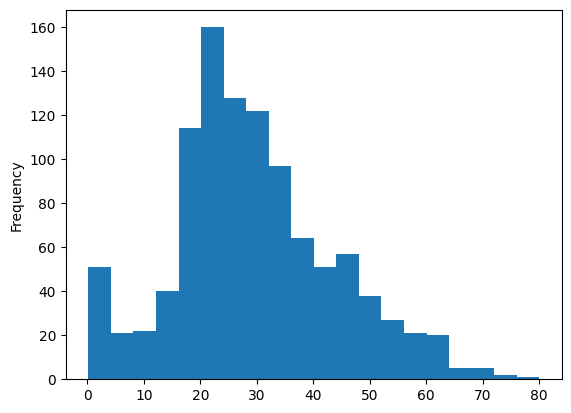

In [87]:
titanic_df.Age.plot.hist(bins=20);
#Gráfico para analizar a idade dos passageiros

In [88]:
#Subistituindo os valores faltantes da idade pela media que é 29 anos
titanic_df.loc[titanic_df.Age.isnull(), 'Age'] = '29'

In [89]:
# Eliminando as colunas 'Cabin', 'PassengerId','Ticket' e 'Name'
titanic_df = titanic_df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1)

In [90]:
# Substituindo os valores 'male' por 0 e 'female' por 1 na coluna 'Sex'

titanic_df['MaleCheck'] = titanic_df.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [91]:
titanic_df[['Sex', 'MaleCheck']].value_counts()

Sex     MaleCheck
male    1            843
female  0            466
Name: count, dtype: int64

In [92]:
#Ultilizando o OneHotEncoder para substituir os valores qualitativas Da coluna Embarked para valores quantitativos
ohe = OneHotEncoder(handle_unknown = 'ignore',dtype ='int32')
ohe = ohe.fit(titanic_df[['Embarked']])



In [93]:
#Transformar Embarked em array
ohe.transform(titanic_df[['Embarked']]).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]], dtype=int32)

In [94]:
ohe_df = pd.DataFrame(ohe.transform(titanic_df[['Embarked']]).toarray(), columns=ohe.get_feature_names_out(['Embarked']))
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1


In [95]:
import pandas as pd

# Redefinir os índices dos DataFrames
titanic_df.reset_index(drop=True, inplace=True)
ohe_df.reset_index(drop=True, inplace=True)

# Concatenar os DataFrames
titanic_df = pd.concat([titanic_df, ohe_df], axis=1)

# Exibir o DataFrame resultante
print(titanic_df)

      Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  \
0            0       3    male  22.0      1      0    7.2500        S   
1            1       1  female  38.0      1      0   71.2833        C   
2            1       3  female  26.0      0      0    7.9250        S   
3            1       1  female  35.0      1      0   53.1000        S   
4            0       3    male  35.0      0      0    8.0500        S   
...        ...     ...     ...   ...    ...    ...       ...      ...   
1304         0       3    male    29      0      0    8.0500        S   
1305         1       1  female  39.0      0      0  108.9000        C   
1306         0       3    male  38.5      0      0    7.2500        S   
1307         0       3    male    29      0      0    8.0500        S   
1308         0       3    male    29      1      1  223.5830        C   

      MaleCheck  Embarked_C  Embarked_Q  Embarked_S  
0             1           0           0           1  
1             0

In [96]:
titanic_df[[ 'Embarked_C', 'Embarked_Q', 'Embarked_S' ]].value_counts()


Embarked_C  Embarked_Q  Embarked_S
0           0           1             916
1           0           0             270
0           1           0             123
Name: count, dtype: int64

In [97]:
titanic_df.drop(['Embarked','Sex'], axis=1, inplace=True)


In [98]:
print("\nNúmero de valores ausentes em cada coluna:")
print(titanic_df.isna().sum())


Número de valores ausentes em cada coluna:
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare          13
MaleCheck      0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [99]:
# Calcular a média dos valores existentes na coluna 'fare'
fare_mean = titanic_df['Fare'].mean()

# Preencher os valores vazios na coluna 'fare' com a média
titanic_df['Fare'].fillna(fare_mean, inplace=True)


In [100]:
titanic_df.head(1000)

,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,1,3,16.0,1,1,8.5167,0,1,0,0
996,0,3,28.0,0,0,22.5250,1,0,0,1
997,0,3,21.0,0,0,7.8208,1,0,1,0
998,0,3,29,0,0,7.7500,1,0,1,0


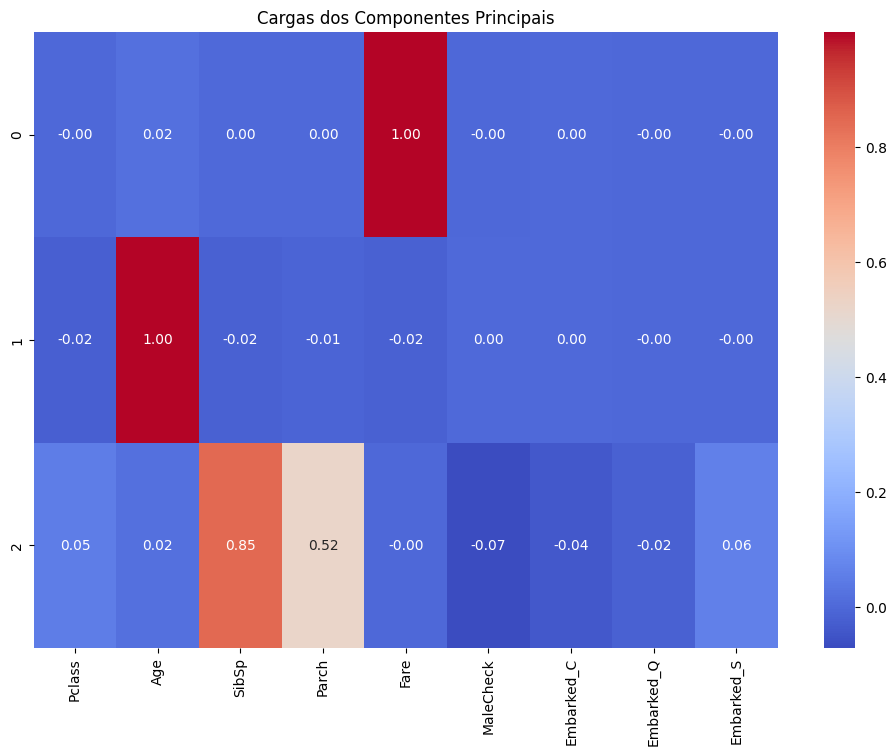

In [101]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Separar as features e o target
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)

componentes_principais = pca.components_

componentes_principais_df = pd.DataFrame(componentes_principais, columns=X.columns)



#Heatmap das cargas dos componentes principais
plt.figure(figsize=(12, 8))
sns.heatmap(componentes_principais_df, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Cargas dos Componentes Principais')
plt.show()

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import ParameterGrid
import numpy as np

param_grid = {'n_clusters': [2,3,5, 10, 15,20,30,40,50,70,80,100, 200, 300], 'random_state': [42]}

for params in ParameterGrid(param_grid):
    # 1. Ajustar o modelo de agrupamento (KMeans)
    kmeans_original = KMeans(**params)
    kmeans_original.fit(X)

    # Avaliar o desempenho do agrupamento na base de dados original
    score_original = davies_bouldin_score(X, kmeans_original.labels_)

    # 3. Aplicar o método de seleção de características
    selector = SelectKBest(score_func=f_classif, k=3)
    X_selected = selector.fit_transform(X, y)

    # 4. Ajustar novamente o modelo de agrupamento à base de dados após a seleção de características
    kmeans_selected = KMeans(**params)
    kmeans_selected.fit(X_selected)

    # 5. Avaliar o desempenho do agrupamento na base de dados após a seleção de características
    score_selected = davies_bouldin_score(X_selected, kmeans_selected.labels_)

    # 6. Comparar os resultados do desempenho do agrupamento antes e depois da seleção de características
    print("Parâmetros:", params)
    print("Davies-Bouldin score antes da seleção de características:", score_original)
    print("Davies-Bouldin score após a seleção de características:", score_selected)
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 2, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.2837460592504008
Davies-Bouldin score após a seleção de características: 0.27564187238812454



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 3, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.4328875254564905
Davies-Bouldin score após a seleção de características: 0.40650878759564874



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 5, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.44830282817506617
Davies-Bouldin score após a seleção de características: 0.38981718244192964



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 10, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.6228122958428381
Davies-Bouldin score após a seleção de características: 0.380709681822328



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 15, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.6456744376821788
Davies-Bouldin score após a seleção de características: 0.3498595334496698



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 20, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.6665935086956979
Davies-Bouldin score após a seleção de características: 0.36922758207144535



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 30, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.7301983883915
Davies-Bouldin score após a seleção de características: 0.3685278266400375



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 40, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.6756122015651164
Davies-Bouldin score após a seleção de características: 0.3868740793152054



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 50, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.7168195713707572
Davies-Bouldin score após a seleção de características: 0.41630444654599763



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 70, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.6744932694763986
Davies-Bouldin score após a seleção de características: 0.4657335012747725



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 80, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.6724303024427183
Davies-Bouldin score após a seleção de características: 0.4266257348666649



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 100, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.667012824772393
Davies-Bouldin score após a seleção de características: 0.4455569855773849



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 200, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.5783664794621387
Davies-Bouldin score após a seleção de características: 0.3034414158460632



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parâmetros: {'n_clusters': 300, 'random_state': 42}
Davies-Bouldin score antes da seleção de características: 0.5635519753588938
Davies-Bouldin score após a seleção de características: 0.10449629595270842



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

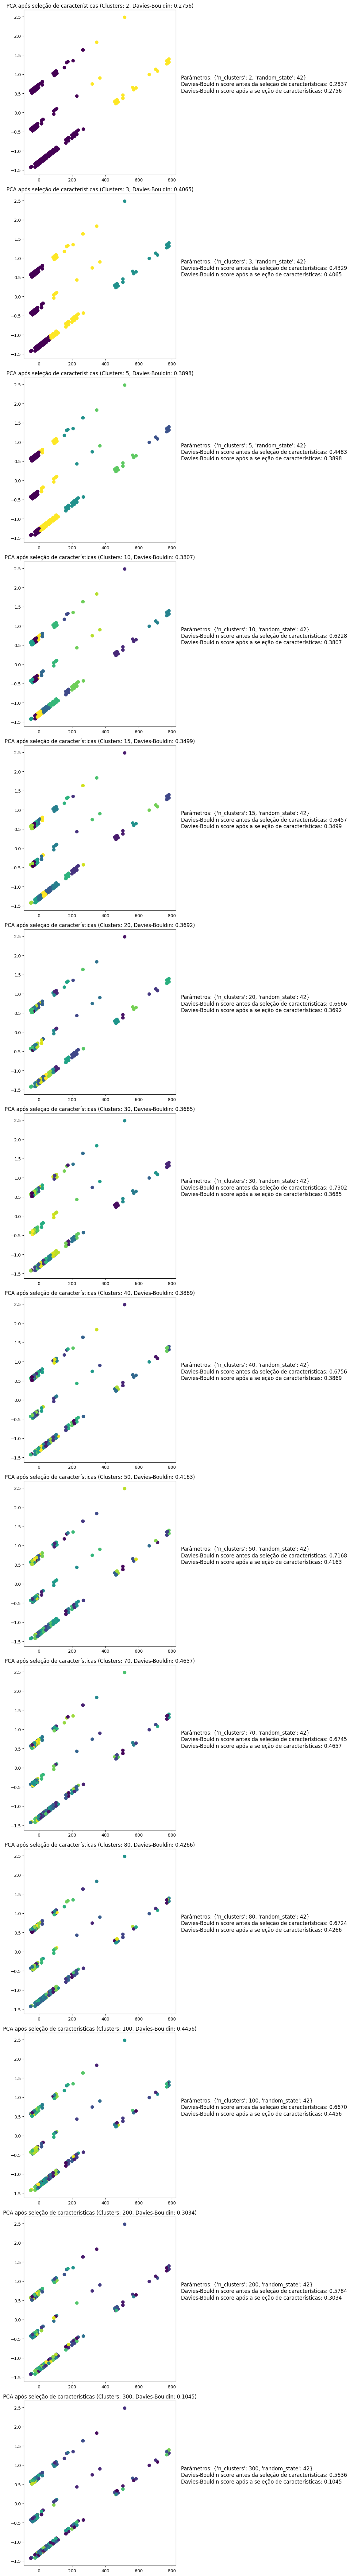

In [103]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

param_grid = {'n_clusters': [2, 3, 5, 10, 15, 20, 30, 40, 50, 70, 80, 100,200, 300], 'random_state': [42]}

# Variáveis para armazenar os resultados
results = []

for params in ParameterGrid(param_grid):
    # 1. Ajustar o modelo de agrupamento (KMeans)
    kmeans_original = KMeans(**params)
    kmeans_original.fit(X)

    # Avaliar o desempenho do agrupamento na base de dados original
    score_original = davies_bouldin_score(X, kmeans_original.labels_)

    # 3. Aplicar o método de seleção de características
    selector = SelectKBest(score_func=f_classif, k=3)
    X_selected = selector.fit_transform(X, y)

    # 4. Ajustar novamente o modelo de agrupamento à base de dados após a seleção de características
    kmeans_selected = KMeans(**params)
    kmeans_selected.fit(X_selected)

    # 5. Avaliar o desempenho do agrupamento na base de dados após a seleção de características
    score_selected = davies_bouldin_score(X_selected, kmeans_selected.labels_)

    # 6. Armazenar os resultados
    results.append((params, score_original, score_selected, X_selected, kmeans_selected))


fig, axes = plt.subplots(nrows=len(results), ncols=2, figsize=(12, 6 * len(results)))

for i, (params, score_original, score_selected, X_selected, kmeans_selected) in enumerate(results):
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_selected)

    axes[i, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_selected.labels_, cmap='viridis', s=50)
    axes[i, 0].set_title(f'PCA após seleção de características (Clusters: {params["n_clusters"]}, Davies-Bouldin: {score_selected:.4f})')

    axes[i, 1].axis('off')
    axes[i, 1].text(0, 0.5, f'Parâmetros: {params}\nDavies-Bouldin score antes da seleção de características: {score_original:.4f}\nDavies-Bouldin score após a seleção de características: {score_selected:.4f}', fontsize=12)

plt.tight_layout()
plt.show()
